# Bike Rentals Prediction - Guided Project

This project aims to predict the number of bike rentals in a given hour. The dataset that we will leverage is the bike rental dataset available from UC Irvine's machine learning [repository] (http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

This dataset comes in an hourly and daily frequency between 2011 - 2012. For the purpose of this project, we will be looking at the hourly data. The data contains the following columns:
- `instant` - A unique sequential ID number for each row
- `dteday` - The date of the rentals
- `season` - The season in which the rentals occurred
- `yr` - The year the rentals occurred
- `mnth` - The month the rentals occurred
- `hr` - The hour the rentals occurred
- `holiday` - Whether or not the day was a holiday
- `weekday` - The day of the week (as a number, 0 to 7)
- `workingday` - Whether or not the day was a working day
- `weathersit` - The weather (as a categorical variable)
- `temp` - The temperature, on a 0-1 scale
- `atemp` - The adjusted temperature
- `hum` - The humidity, on a 0-1 scale
- `windspeed` - The wind speed, on a 0-1 scale
- `casual` - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- `registered` - The number of registered riders (people who had already signed up)
- `cnt` - The total number of bike rentals (`casual` + `registered`)

### 1. Dataset exploration and cleaning (if applicable)

In [3]:
# import all required modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

pd.set_option("display.max_columns", 100)
plt.style.use('fivethirtyeight')

In [2]:
bike_rentals = pd.read_csv("hour.csv", parse_dates=["dteday"])
bike_rentals = bike_rentals.iloc[:, 1:]
bike_rentals.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:xlabel='cnt', ylabel='Count'>

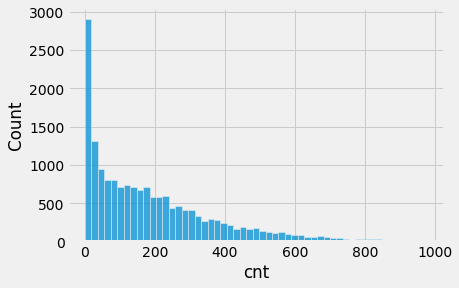

In [6]:
sns.histplot(data=bike_rentals, x="cnt")

The histogram tells us that on the distribution is left-skewed, with most days having fewer than 200 bike rentals per day. Next, let's generate a correlation between different columns

<AxesSubplot:>

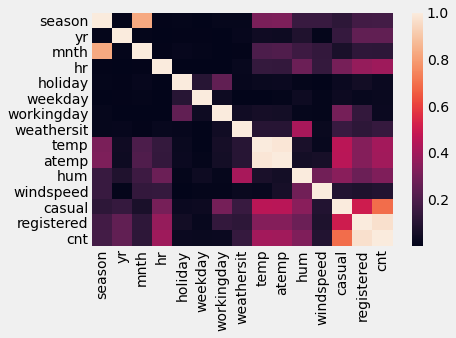

In [11]:
correlation = abs(bike_rentals.corr())
sns.heatmap(correlation)

Interestingly, there doesn't seem to be a very strong correlation between any of the variables and the number of bike rentals for the hour (`casual`, `registerd` and `cnt`). The strongest correlation seems to be the hour of the day, whether it's a weekday for `casual` users and the temperature of the day.

Next, we will introduce a new feature to instead represent the time of the day as morning, afternoon, evening and night instead of just the hour of the day. 

In [17]:
# create a function to apply label based on the time of the day
def apply_label(num):
    if math.floor(row["hr"] / 6.0) == 0:
        return 4
    else:
        return math.floor(row["hr"] / 6.0)

3
